## data basic features - train one linear regression model

Content:
- data: basic features: units_sold	price	region	peak

- Model: artifact that contain the model and the feature engineering (previosly a feature engineering was done, but for example objetive, in this part a do more feature engineering and "compile" it with the model)

- **DO THE SAME AS NOTEBOOK 1, BUT TRAINING A GRADIENT BOOSTING INSTEAD OF LINEAR REGRESSION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### 0. Root repo

In [2]:
import os
# fix root path to save outputs
actual_path = os.path.abspath(os.getcwd())
list_root_path = actual_path.split('\\')[:-1]
root_path = '\\'.join(list_root_path)
os.chdir(root_path)
print('root path: ', root_path)

root path:  D:\github-mi-repo\Examples-Gurobi-ML


### 1. Read data

In [3]:
# read data
path_data_basic_features = 'artifacts/data/data_basic_features.pkl'
data = pd.read_pickle(path_data_basic_features)

data.head()

,units_sold,price,region,peak
date,,,,
2015-01-04,3.382800,1.02,Great_Lakes,0
2015-01-04,2.578275,1.10,Midsouth,0
2015-01-04,5.794411,0.89,West,0
2015-01-04,3.204112,0.98,Southeast,0
2015-01-04,0.321824,1.05,Northern_New_England,0


### 2. Generate X, y, list features, list segmentation data

In [4]:
""" Define features and target """
# target
target = 'units_sold'
list_target = [target]

# list features - all variables in dataframe that are not target
list_features = list(set(data.columns.tolist()) - set([target]))

### set manually list features
list_features = ['region', 'peak', 'price']

print('list_features: ', list_features)
print('list_target: ', list_target)

list_features:  ['region', 'peak', 'price']
list_target:  ['units_sold']


In [5]:
""" create data X - features // y - target """
data_X = data[list_features]
data_y = data[list_target]

In [6]:
""" Create list regions """
list_regions = data_X['region'].unique().tolist()
list_regions.sort()
list_regions

['Great_Lakes',
 'Midsouth',
 'Northeast',
 'Northern_New_England',
 'Plains',
 'SouthCentral',
 'Southeast',
 'West']

In [7]:
data_X.head()

,region,peak,price
date,,,
2015-01-04,Great_Lakes,0,1.02
2015-01-04,Midsouth,0,1.10
2015-01-04,West,0,0.89
2015-01-04,Southeast,0,0.98
2015-01-04,Northern_New_England,0,1.05


In [8]:
data_y.head()

,units_sold
date,
2015-01-04,3.382800
2015-01-04,2.578275
2015-01-04,5.794411
2015-01-04,3.204112
2015-01-04,0.321824


### 3. Split - train - test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_X, 
                                                    data_y, 
                                                    train_size = 0.7, 
                                                    random_state = 42
                                                   )

In [10]:
print('shapes')
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

shapes
X_train:  (2116, 3)
y_train:  (2116, 1)
X_test:  (908, 3)
y_test:  (908, 1)


In [11]:
X_train.head(2)

,region,peak,price
date,,,
2016-06-05,Plains,1,0.930000
2019-08-18,West,0,1.365767


In [12]:
y_train.head(2)

,units_sold
date,
2016-06-05,2.330438
2019-08-18,5.568754


In [13]:
X_test.head(2)

,region,peak,price
date,,,
2022-05-08,Southeast,1,1.471889
2015-08-09,West,0,1.010000


In [14]:
y_test.head(2)

,units_sold
date,
2022-05-08,4.477437
2015-08-09,5.531488


### 4. Pipeline processing data
- Region string, transform into categorical features
- Peak ok
- price normalize continuous variable

In [15]:
feat_transform = make_column_transformer(
    (OneHotEncoder(drop="first"), ["region"]),
    (StandardScaler(), ["price"]),
    ("passthrough", ["peak"]),
    verbose_feature_names_out=False, # conserve original column names
    remainder='drop'
)

In [16]:
# shape output
feat_transform.fit_transform(X_train).shape

(2116, 9)

In [17]:
# example output
feat_transform.fit_transform(X_train)[0, :]

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.98007096,  1.        ])

In [18]:
# original example output
X_train.iloc[0, :]

region    Plains
peak           1
price       0.93
Name: 2016-06-05 00:00:00, dtype: object

### 5. Pipeline processing data + train model

In [19]:
# NOTEBOOK 1 - TRAIN A LINEAR MODEL
#model_pipeline = make_pipeline(feat_transform, LinearRegression())

In [20]:
# IN THIS NOTEBOOK TRAIN A GRADIENT BOOSTING
model_pipeline = make_pipeline(feat_transform, 
                               GradientBoostingRegressor(n_estimators=100, max_leaf_nodes = 20, loss = 'absolute_error', random_state = 123)
                              )

### 6. Train with cross validation

In [21]:
# get scores of cross validation - R2
scores = cross_val_score(model_pipeline, X_train, y_train, cv=5)
scores

D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was pass

array([0.88427313, 0.89089946, 0.8942788 , 0.88219807, 0.86732296])

In [22]:
pd.DataFrame(scores).describe()

,0
count,5.000000
mean,0.883794
std,0.010422
min,0.867323
25%,0.882198
50%,0.884273
75%,0.890899
max,0.894279


### 7. Train model with all train dataset

In [23]:
model_pipeline.fit(X_train, y_train)

D:\Anaconda\envs\data-science-python-3-10-gurobi\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['region']),
                                                 ('standardscaler',
                                                  StandardScaler(), ['price']),
                                                 ('passthrough', 'passthrough',
                                                  ['peak'])],
                                   verbose_feature_names_out=False)),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='absolute_error',
                                           max_leaf_nodes=20,
                                           random_state=123))])

## 8. Evaluate Performance Model

## -> Performance all data
Evaluate performance of the model with all the train and test data

#### 8.0 Get y_train_pred , y_test_pred

In [24]:
# y train pred
y_train_pred = model_pipeline.predict(X_train)
y_train_pred = pd.DataFrame(y_train_pred)

# y test pred
y_test_pred = model_pipeline.predict(X_test)
y_test_pred = pd.DataFrame(y_test_pred)

#### 8.1. Evaluate performance model - metrics

In [25]:
def print_metrics_evaluation(y_train,  y_train_pred, y_test, y_test_pred):
    """
    Print metrics of supervised models. Train and Test metrics

    Args:
        y_train
        y_train_pred
        y_test
        y_test_pred
    """
    # evaluate model
    
    # r2
    r2_train = r2_score(y_train, y_train_pred).round(3)
    r2_test = r2_score(y_test, y_test_pred).round(3)
    
    print('\nR2')
    print('r2_train: ', r2_train)
    print('r2_test: ', r2_test)
    
    
    # mae
    mae_train = mean_absolute_error(y_train, y_train_pred).round(3)
    mae_test = mean_absolute_error(y_test, y_test_pred).round(3)
    
    print('\nMAE')
    print('mae_train: ', mae_train)
    print('mae_test: ', mae_test)
    
    # mse
    mse_train = mean_squared_error(y_train, y_train_pred, squared = True).round(3)
    mse_test= mean_squared_error(y_test, y_test_pred, squared = True).round(3)
    
    print('\nMSE')
    print('mse_train: ', mse_train)
    print('mse_test: ', mse_test)
    
    
    # rmse
    rmse_train = mean_squared_error(y_train, y_train_pred, squared = False).round(3)
    rmse_test= mean_squared_error(y_test, y_test_pred, squared = False).round(3)
    
    print('\nRMSE')
    print('rmse_train: ', rmse_train)
    print('rmse_test: ', rmse_test)

In [26]:
print_metrics_evaluation(y_train,  y_train_pred, y_test, y_test_pred)


R2
r2_train:  0.898
r2_test:  0.892

MAE
mae_train:  0.47
mae_test:  0.483

MSE
mse_train:  0.442
mse_test:  0.449

RMSE
rmse_train:  0.665
rmse_test:  0.67


#### 8.2 Evaluate performance model - y true vs y_predicted

In [28]:
def plot_y_true_vs_y_pred(df_y_true, df_y_pred, title_plot):
    """
    Plot y_true vs y_pred. Both in format dataframe
    """
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(df_y_true, df_y_pred, alpha=0.3, marker='x', label='y_true vs y_pred')

    # Add bisectriz
    x = np.linspace(df_y_true.min()[0], df_y_true.max()[0], df_y_true.shape[0])
    y = x  # Bisectriz: y = x
    ax.plot(x, y, label='Bisectriz', color='red', alpha=0.3)

    # Add names to axis
    ax.set_xlabel('Y true')
    ax.set_ylabel('Y pred')
    
    ax.set_title(title_plot)
    ax.legend()

    return fig

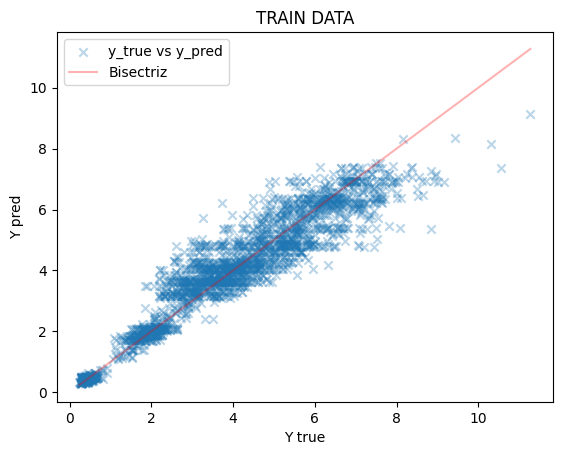

In [29]:
# plot TRAIN
plot_true_pred_train = plot_y_true_vs_y_pred(df_y_true = y_train,
                                               df_y_pred = y_train_pred,
                                             title_plot = 'TRAIN DATA'
                                              )

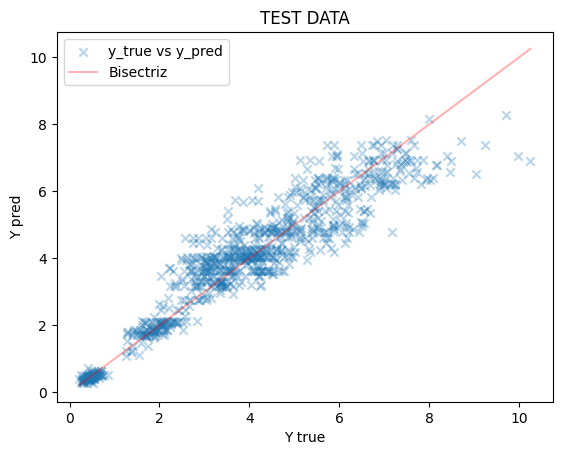

In [30]:
# plot TEST
plot_true_pred_test = plot_y_true_vs_y_pred(df_y_true = y_test,
                     df_y_pred = y_test_pred,
                                            title_plot = 'TEST DATA'
                     )

## -> Performance by region
Evaluate performance of the model with the data segmented. In this example, divide by region

#### 8.3 Evaluate performance model by region - metrics by region

In [31]:
def get_metric_each_region(X, y, model, list_regions):
    """
    Split data by each region and calculate the metric of a segmented data
    """

    ## list to save metrics to calculate
    list_r2_each_region = []
    list_mae_each_region = []
    list_mse_each_region = []
    list_rmse_reach_region = []

    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]

    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
        
        # evaluate metric
        r2_aux = r2_score(y_filter_region, y_filter_region_pred).round(3) # r2
        mae_aux = mean_absolute_error(y_filter_region, y_filter_region_pred).round(3)
        mse_aux = mean_squared_error(y_filter_region, y_filter_region_pred, squared = True).round(3)
        rmse_aux = mean_squared_error(y_filter_region, y_filter_region_pred, squared = False).round(3)

        # save in a list
        list_r2_each_region.append(r2_aux)
        list_mae_each_region.append(mae_aux)
        list_mse_each_region.append(mse_aux)
        list_rmse_reach_region.append(rmse_aux)


    #save as df
    df_metrics_each_region = pd.DataFrame()
    df_metrics_each_region['region'] = list_regions
    df_metrics_each_region['r2'] = list_r2_each_region
    df_metrics_each_region['mae'] = list_mae_each_region
    df_metrics_each_region['mse'] = list_mse_each_region
    df_metrics_each_region['rmse'] = list_rmse_reach_region

    return df_metrics_each_region

In [32]:
# r2 each region - TRAIN
get_metric_each_region(X = X_train.copy(),
                      y = y_train.copy(),
                      model = model_pipeline,
                      list_regions = list_regions
                      )

,region,r2,mae,mse,rmse
0,Great_Lakes,0.397,0.462,0.364,0.604
1,Midsouth,0.306,0.466,0.329,0.574
2,Northeast,0.329,0.711,0.837,0.915
3,Northern_New_England,0.378,0.071,0.009,0.093
4,Plains,0.546,0.200,0.068,0.261
5,SouthCentral,0.509,0.530,0.506,0.711
6,Southeast,0.366,0.716,0.766,0.875
7,West,0.475,0.606,0.655,0.809


In [33]:
# r2 each region - TEST
get_metric_each_region(X = X_test.copy(),
                      y = y_test.copy(),
                      model = model_pipeline,
                       list_regions = list_regions
                      )

,region,r2,mae,mse,rmse
0,Great_Lakes,0.234,0.477,0.354,0.595
1,Midsouth,0.340,0.478,0.349,0.591
2,Northeast,0.351,0.587,0.565,0.752
3,Northern_New_England,0.338,0.073,0.010,0.099
4,Plains,0.446,0.190,0.061,0.248
5,SouthCentral,0.432,0.609,0.687,0.829
6,Southeast,0.390,0.694,0.710,0.843
7,West,0.305,0.759,0.884,0.940


#### 8.4 Evaluate y_true vs y_pred by region (individual plot)

In [34]:
def plot_y_true_vs_y_pred_each_regions(X, y, model, list_regions):
    """
    Plot y_true vs y_predict for each region.
    Use the individual function to plot y_true vs y_pred
    """
    
    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]

    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
    
    
        # plot
        plot_y_true_vs_y_pred(df_y_true = y_filter_region,
                             df_y_pred = y_filter_region_pred,
                              title_plot = f'y_true vs y_pred for region: {region_name}'
                             )

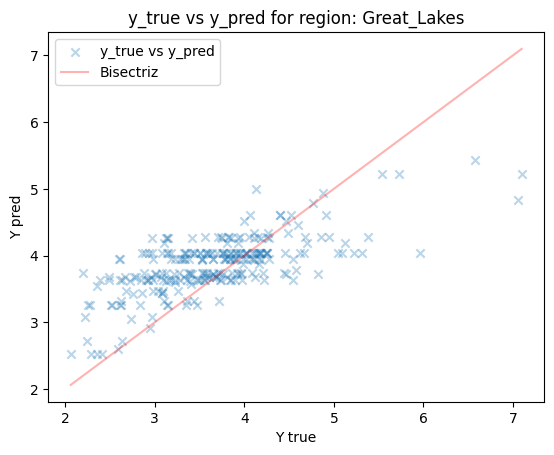

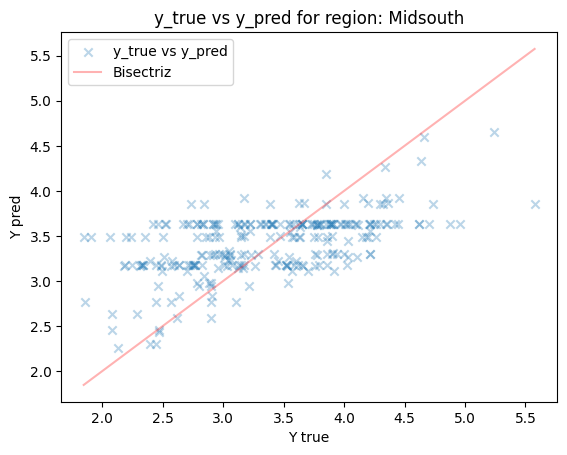

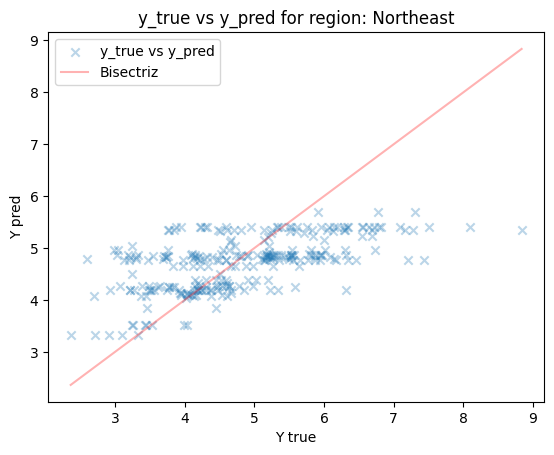

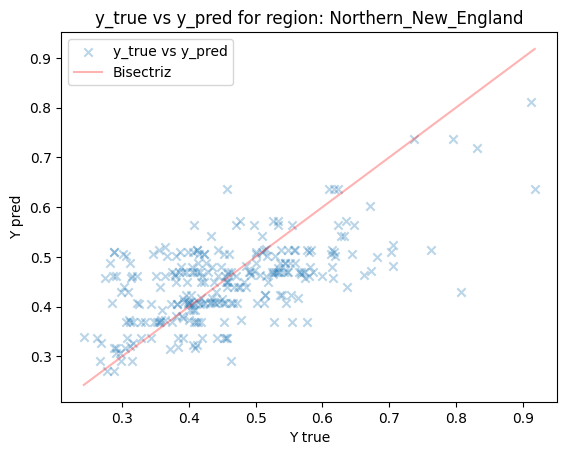

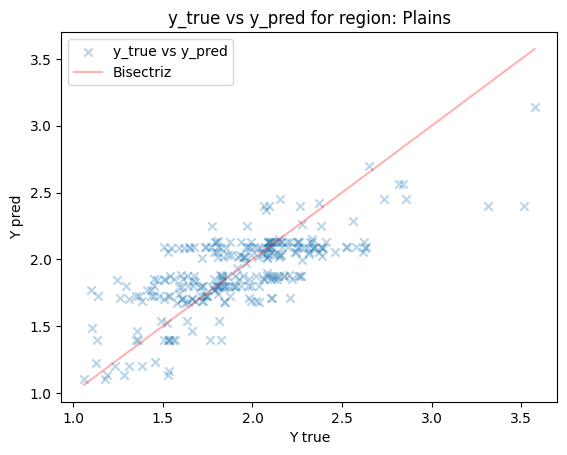

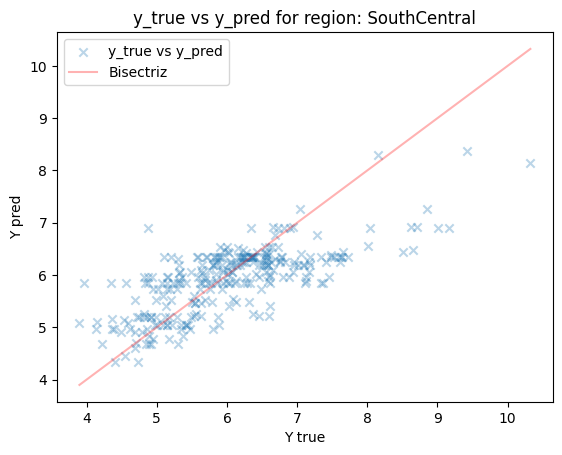

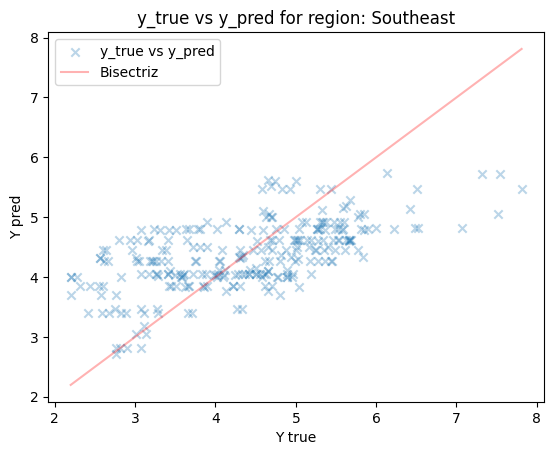

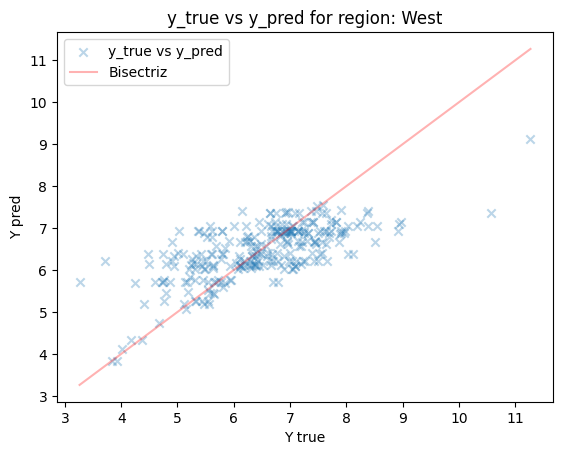

In [35]:
# DATA TRAIN
plot_y_true_vs_y_pred_each_regions(X = X_train.copy(),
                                   y = y_train.copy(),
                                   model = model_pipeline,
                                   list_regions =  list_regions
                                  )

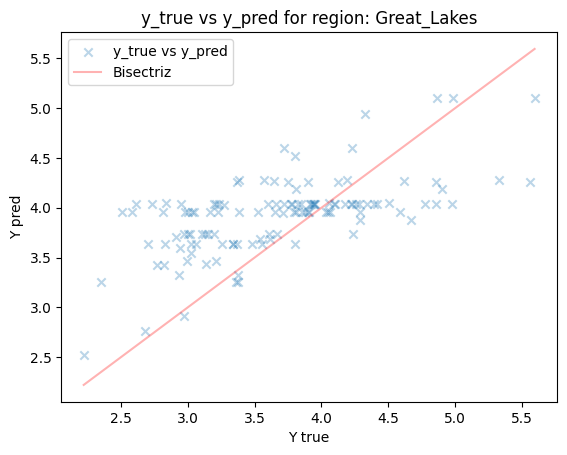

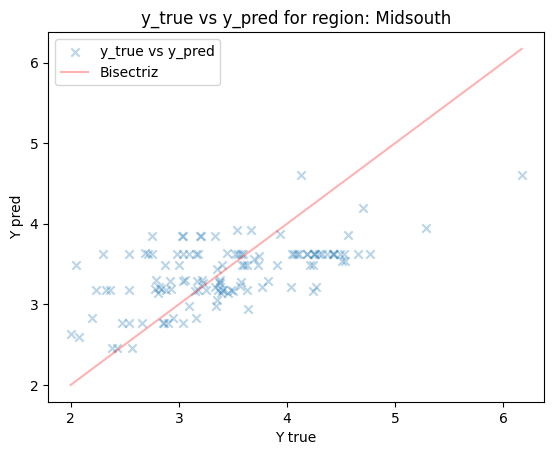

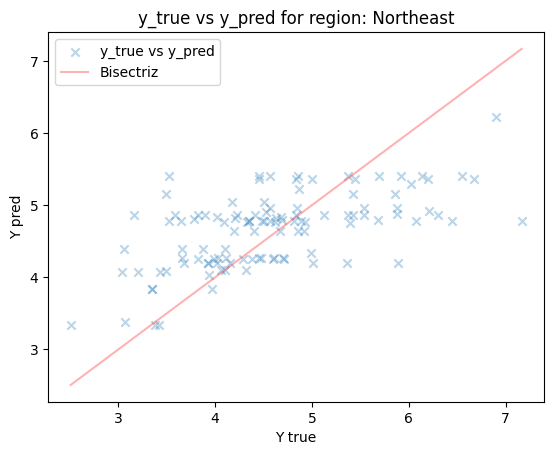

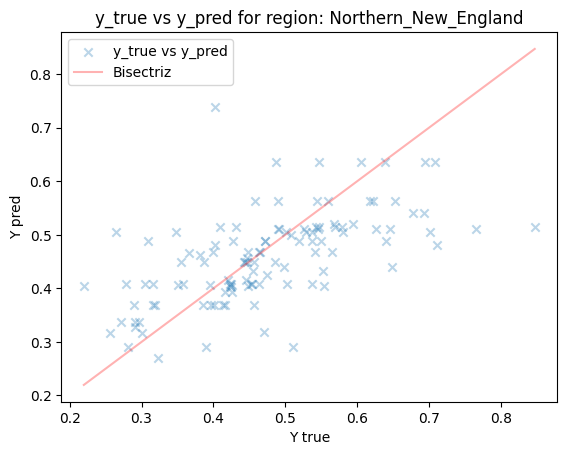

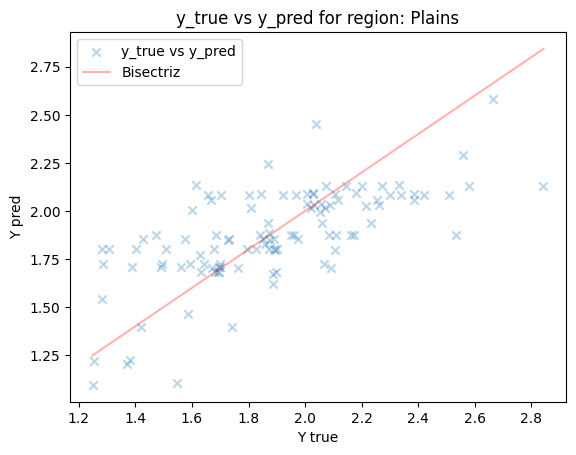

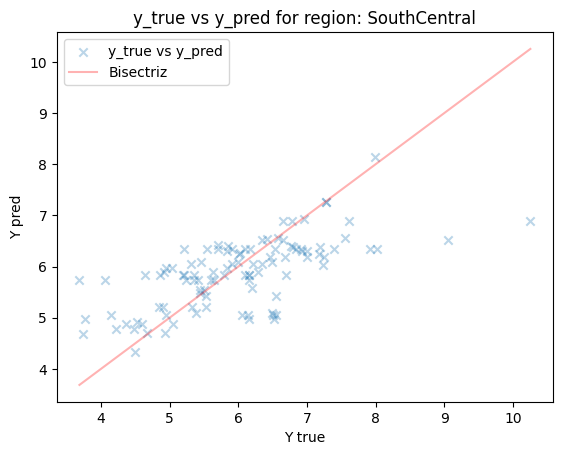

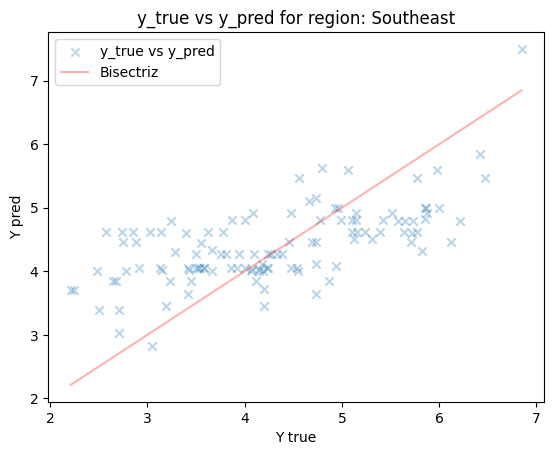

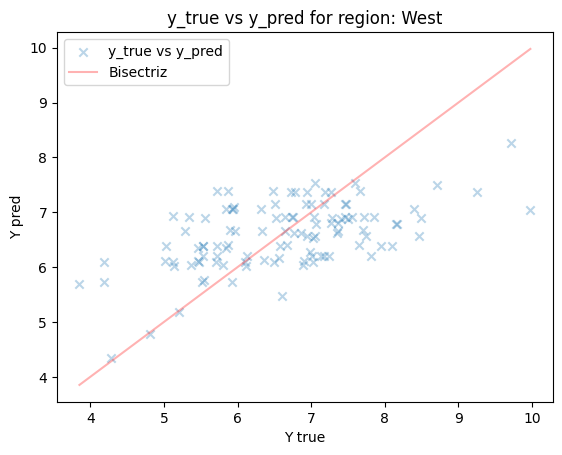

In [36]:
# DATA TEST
plot_y_true_vs_y_pred_each_regions(X = X_test.copy(),
                                   y = y_test.copy(),
                                   model = model_pipeline,
                                   list_regions = list_regions
                                  )

#### 8.5 Evaluate y_true vs y_pred by region (one plot true vs pred - colored by region)

In [37]:
X = X_train.copy()
y = y_train.copy()
model = model_pipeline

In [38]:
def plot_y_true_vs_y_pred_color_regions(X, y, model, list_regions):
    """
    y_true vs y_pred for all data, colored by region
    """

    # add column region in data "y" to filter data by region
    y['region'] = X[['region']]
    
    for region_name in list_regions:
        #print(region_name)
    
        # generate X filtered by region
        X_filter_region = X[X['region'] == region_name]
        #print('debugging order columns: ', X_filter_region.columns.tolist())
        
        # generate y filtered by region
        y_filter_region = y[y['region'] == region_name]
        y_filter_region = y_filter_region.drop(columns = 'region')
        
        # predict
        y_filter_region_pred = model.predict(X_filter_region)
        y_filter_region_pred = pd.DataFrame(y_filter_region_pred)
    
    
        # plot scatter plot for each region
        ### plot scatter plot
        fig_plot = plt.scatter(y_filter_region, 
                               y_filter_region_pred,
                              alpha = 0.3,
                              marker = 'x',
                              label = f'region: {region_name}')
        
        ### add names to axis
        plt.xlabel('Y true')
        plt.ylabel('Y pred')
    
    
    ### add bisectriz 
    x_bisectriz = np.linspace(y.min()[0], y.max()[0], y.shape[0])
    y_bisectriz = x_bisectriz  # Bisectriz: y = x
    plt.plot(x_bisectriz, y_bisectriz, label='Bisectriz', color='red')
    
    # title
    plt.title('y_true vs y_pred')
    plt.legend()

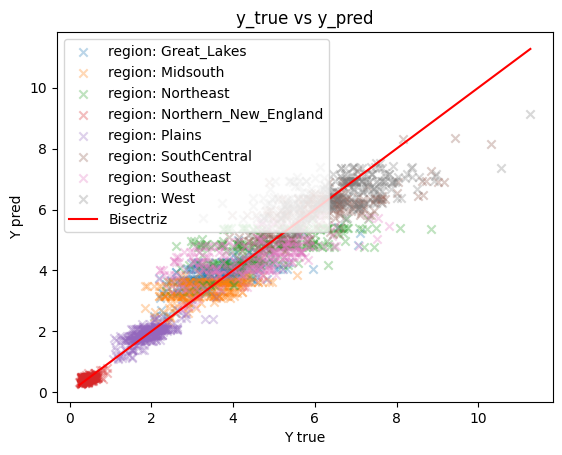

In [39]:
### DATA TRAIN
plot_y_true_vs_y_pred_color_regions(X = X_train.copy(),
                                    y = y_train.copy(),
                                    model = model_pipeline,
                                    list_regions = list_regions
                                   )

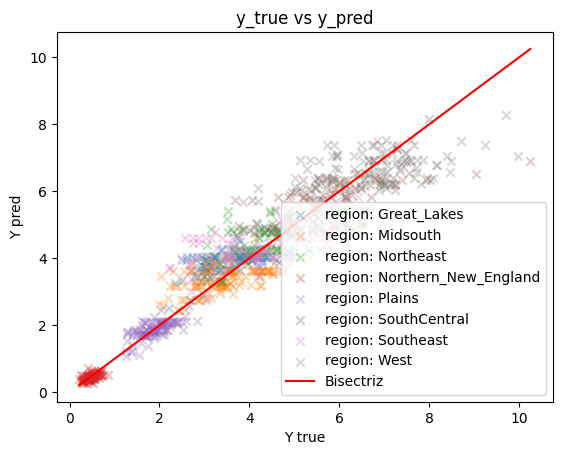

In [40]:
### DATA TEST
plot_y_true_vs_y_pred_color_regions(X = X_test.copy(),
                                    y = y_test.copy(),
                                    model = model_pipeline,
                                    list_regions = list_regions
                                   )

#### 8.X Evaluate model - business logic
Evaluate performance model according to a business logic